In [ ]:
!pip install fiftyone


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
import os
import fiftyone as fo
import fiftyone.zoo as foz
import random
import shutil


# vienos klases nuotrauku ir ju kaukiu atsiuntimas & export
def exportClassDataset(className, num_samples = 10):
  dataset_class = foz.load_zoo_dataset(
    "open-images-v6",
    "train",
    label_types=["segmentations"],
    classes=[className],
    max_samples=num_samples,
    seed=51,
    shuffle=False,
    dataset_name="open-images-"+className,
    overwrite=True
  )

  set_dir = os.path.join(google_drive_dir, className, "all")
  os.makedirs(set_dir, exist_ok=True)

  dataset_class.export(
      export_dir=set_dir,
      dataset_type=fo.types.ImageSegmentationDirectory
  )

  fo.delete_dataset("open-images-"+className)

  return set_dir

# padalinimas i train/validation/test directories su 0.7/0.2/0.1 santykiu
def splitExported(set_dir, className):
  train_dir = os.path.join(google_drive_dir, className, "train")
  validation_dir = os.path.join(google_drive_dir, className, "validation")
  test_dir = os.path.join(google_drive_dir, className, "test")

  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(validation_dir, exist_ok=True)
  os.makedirs(test_dir, exist_ok=True)

  # Set the split ratios
  train_split = 0.7
  validation_split = 0.2
  test_split = 0.1

  # Get all image filenames
  all_images_dir = os.path.join(set_dir, "data")
  all_masks_dir = os.path.join(set_dir, "labels")

  all_images = os.listdir(all_images_dir)

  # Shuffle the filenames
  random.seed(42)
  random.shuffle(all_images)

  # Calculate the number of samples for each split
  num_train = int(len(all_images) * train_split)
  num_validation = int(len(all_images) * validation_split)

  # Split the data
  train_images = all_images[:num_train]
  validation_images = all_images[num_train:num_train + num_validation]
  test_images = all_images[num_train + num_validation:]

  # Move the files to the respective directories
  def move_files(src_images_dir, src_masks_dir, dst_images_dir, dst_masks_dir, filenames):
      for filename in filenames:
          src_image_path = os.path.join(src_images_dir, filename)
          dst_image_path = os.path.join(dst_images_dir, filename)
          shutil.move(src_image_path, dst_image_path)

          mask_filename = os.path.splitext(filename)[0] + ".png"
          src_mask_path = os.path.join(src_masks_dir, mask_filename)
          dst_mask_path = os.path.join(dst_masks_dir, mask_filename)
          shutil.move(src_mask_path, dst_mask_path)

  os.makedirs(os.path.join(train_dir, "data"), exist_ok=True)
  os.makedirs(os.path.join(train_dir, "labels"), exist_ok=True)
  move_files(all_images_dir, all_masks_dir, os.path.join(train_dir, "data"), os.path.join(train_dir, "labels"), train_images)

  os.makedirs(os.path.join(validation_dir, "data"), exist_ok=True)
  os.makedirs(os.path.join(validation_dir, "labels"), exist_ok=True)
  move_files(all_images_dir, all_masks_dir, os.path.join(validation_dir, "data"), os.path.join(validation_dir, "labels"), validation_images)

  os.makedirs(os.path.join(test_dir, "data"), exist_ok=True)
  os.makedirs(os.path.join(test_dir, "labels"), exist_ok=True)
  move_files(all_images_dir, all_masks_dir, os.path.join(test_dir, "data"), os.path.join(test_dir, "labels"), test_images)

  # Clean up empty "all" directories
  shutil.rmtree(all_images_dir)
  shutil.rmtree(all_masks_dir)

Migrating database to v0.20.1


INFO:fiftyone.migrations.runner:Migrating database to v0.20.1


Mounted at /content/gdrive


In [ ]:
!rm -r /content/gdrive/MyDrive/OIDv6/lab3/data

rm: cannot remove '/content/gdrive/MyDrive/OIDv6/lab3/data': No such file or directory


In [ ]:
print(fo.utils.openimages.get_classes())

INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/tmp/tmpf9sroi3s/metadata/classes.csv'


['Accordion', 'Adhesive tape', 'Aircraft', 'Airplane', 'Alarm clock', 'Alpaca', 'Ambulance', 'Animal', 'Ant', 'Antelope', 'Apple', 'Armadillo', 'Artichoke', 'Auto part', 'Axe', 'Backpack', 'Bagel', 'Baked goods', 'Balance beam', 'Ball', 'Balloon', 'Banana', 'Band-aid', 'Banjo', 'Barge', 'Barrel', 'Baseball bat', 'Baseball glove', 'Bat (Animal)', 'Bathroom accessory', 'Bathroom cabinet', 'Bathtub', 'Beaker', 'Bear', 'Bed', 'Bee', 'Beehive', 'Beer', 'Beetle', 'Bell pepper', 'Belt', 'Bench', 'Bicycle', 'Bicycle helmet', 'Bicycle wheel', 'Bidet', 'Billboard', 'Billiard table', 'Binoculars', 'Bird', 'Blender', 'Blue jay', 'Boat', 'Bomb', 'Book', 'Bookcase', 'Boot', 'Bottle', 'Bottle opener', 'Bow and arrow', 'Bowl', 'Bowling equipment', 'Box', 'Boy', 'Brassiere', 'Bread', 'Briefcase', 'Broccoli', 'Bronze sculpture', 'Brown bear', 'Building', 'Bull', 'Burrito', 'Bus', 'Bust', 'Butterfly', 'Cabbage', 'Cabinetry', 'Cake', 'Cake stand', 'Calculator', 'Camel', 'Camera', 'Can opener', 'Canary', '

In [ ]:
# nuotrauku atsisiuntimas, eksportavimas ir paskirstymas

classes = ["Car", "Cat", "Dog"]

for class_i in classes:
  print(class_i)
  dir = exportClassDataset(class_i, 1000)
  splitExported(dir, class_i)


Car


INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/open-images-v6/train' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv' to '/root/fiftyone/open-images-v6/train/metadata/image_ids.csv'


 100% |██████|    4.8Gb/4.8Gb [15.3s elapsed, 0s remaining, 322.2Mb/s]      


INFO:eta.core.utils: 100% |██████|    4.8Gb/4.8Gb [15.3s elapsed, 0s remaining, 322.2Mb/s]      


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/root/fiftyone/open-images-v6/train/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/classes-segmentation.txt' to '/root/fiftyone/open-images-v6/train/metadata/segmentation_classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmp0h2zaq6f/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-annotations-object-segmentation.csv' to '/root/fiftyone/open-images-v6/train/labels/segmentations.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-0.zip' to '/root/fiftyone/open-images-v6/train/labels/masks/0.zip'


INFO:fiftyone.utils.openimages:Downloading 1000 images


 100% |█████████████████| 1000/1000 [2.2m elapsed, 0s remaining, 6.5 files/s]       


INFO:eta.core.utils: 100% |█████████████████| 1000/1000 [2.2m elapsed, 0s remaining, 6.5 files/s]       


Dataset info written to '/root/fiftyone/open-images-v6/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/open-images-v6/info.json'


Loading 'open-images-v6' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v6' split 'train'


 100% |███████████████| 1000/1000 [2.1m elapsed, 0s remaining, 12.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [2.1m elapsed, 0s remaining, 12.1 samples/s]      


Dataset 'open-images-Car' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-Car' created


Directory '/content/gdrive/MyDrive/OIDv6/lab3/data/Car/all' already exists; export will be merged with existing files


 100% |███████████████| 1000/1000 [39.0s elapsed, 0s remaining, 28.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [39.0s elapsed, 0s remaining, 28.6 samples/s]      


Cat
Overwriting existing directory '/root/fiftyone/open-images-v6/train'


INFO:fiftyone.zoo.datasets:Overwriting existing directory '/root/fiftyone/open-images-v6/train'


INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/open-images-v6/train' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv' to '/root/fiftyone/open-images-v6/train/metadata/image_ids.csv'


 100% |██████|    4.8Gb/4.8Gb [15.3s elapsed, 0s remaining, 332.9Mb/s]      


INFO:eta.core.utils: 100% |██████|    4.8Gb/4.8Gb [15.3s elapsed, 0s remaining, 332.9Mb/s]      


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/root/fiftyone/open-images-v6/train/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/classes-segmentation.txt' to '/root/fiftyone/open-images-v6/train/metadata/segmentation_classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmplrq3b6ot/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-annotations-object-segmentation.csv' to '/root/fiftyone/open-images-v6/train/labels/segmentations.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-0.zip' to '/root/fiftyone/open-images-v6/train/labels/masks/0.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-1.zip' to '/root/fiftyone/open-images-v6/train/labels/masks/1.zip'


INFO:fiftyone.utils.openimages:Downloading 1000 images


 100% |█████████████████| 1000/1000 [2.3m elapsed, 0s remaining, 6.2 files/s]       


INFO:eta.core.utils: 100% |█████████████████| 1000/1000 [2.3m elapsed, 0s remaining, 6.2 files/s]       


Dataset info written to '/root/fiftyone/open-images-v6/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/open-images-v6/info.json'


Loading 'open-images-v6' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v6' split 'train'


 100% |███████████████| 1000/1000 [1.0m elapsed, 0s remaining, 16.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [1.0m elapsed, 0s remaining, 16.2 samples/s]      


Dataset 'open-images-Cat' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-Cat' created


Directory '/content/gdrive/MyDrive/OIDv6/lab3/data/Cat/all' already exists; export will be merged with existing files


 100% |███████████████| 1000/1000 [38.4s elapsed, 0s remaining, 23.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [38.4s elapsed, 0s remaining, 23.8 samples/s]      


Dog
Overwriting existing directory '/root/fiftyone/open-images-v6/train'


INFO:fiftyone.zoo.datasets:Overwriting existing directory '/root/fiftyone/open-images-v6/train'


INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/open-images-v6/train' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv' to '/root/fiftyone/open-images-v6/train/metadata/image_ids.csv'


 100% |██████|    4.8Gb/4.8Gb [13.9s elapsed, 0s remaining, 365.3Mb/s]      


INFO:eta.core.utils: 100% |██████|    4.8Gb/4.8Gb [13.9s elapsed, 0s remaining, 365.3Mb/s]      


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/root/fiftyone/open-images-v6/train/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/classes-segmentation.txt' to '/root/fiftyone/open-images-v6/train/metadata/segmentation_classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmpj1lp49kd/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-annotations-object-segmentation.csv' to '/root/fiftyone/open-images-v6/train/labels/segmentations.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-0.zip' to '/root/fiftyone/open-images-v6/train/labels/masks/0.zip'


INFO:fiftyone.utils.openimages:Downloading 1000 images


 100% |█████████████████| 1000/1000 [2.2m elapsed, 0s remaining, 6.7 files/s]       


INFO:eta.core.utils: 100% |█████████████████| 1000/1000 [2.2m elapsed, 0s remaining, 6.7 files/s]       


Dataset info written to '/root/fiftyone/open-images-v6/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/open-images-v6/info.json'


Loading 'open-images-v6' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v6' split 'train'


 100% |███████████████| 1000/1000 [1.2m elapsed, 0s remaining, 15.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [1.2m elapsed, 0s remaining, 15.0 samples/s]      


Dataset 'open-images-Dog' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-Dog' created


Directory '/content/gdrive/MyDrive/OIDv6/lab3/data/Dog/all' already exists; export will be merged with existing files


 100% |███████████████| 1000/1000 [46.2s elapsed, 0s remaining, 21.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [46.2s elapsed, 0s remaining, 21.7 samples/s]      


In [7]:
# google drive

from google.colab import drive

drive.mount('/content/gdrive')
google_drive_dir = "/content/gdrive/MyDrive/OIDv6/lab3/data"

Mounted at /content/gdrive


In [2]:
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
class UNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=0.5):
        super(UNetBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.block(x)

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.enc1 = UNetBlock(in_channels, 32)
        self.enc2 = UNetBlock(32, 64)
        self.enc3 = UNetBlock(64, 128)
        self.enc4 = UNetBlock(128, 256)
        self.enc5 = UNetBlock(256, 512)
        self.enc6 = UNetBlock(512, 1024)
        self.enc7 = UNetBlock(1024, 2048)
        self.enc8 = UNetBlock(2048, 4096)

        self.pool = nn.MaxPool2d(2)

        self.up7 = nn.ConvTranspose2d(4096, 2048, 2, stride=2)
        self.dec7 = UNetBlock(4096, 2048)
        self.up6 = nn.ConvTranspose2d(2048, 1024, 2, stride=2)
        self.dec6 = UNetBlock(2048, 1024)
        self.up5 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.dec5 = UNetBlock(1024, 512)
        self.up4 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec4 = UNetBlock(512, 256)
        self.up3 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec3 = UNetBlock(256, 128)
        self.up2 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec2 = UNetBlock(128, 64)
        self.up1 = nn.ConvTranspose2d(64, 32, 2, stride=2)
        self.dec1 = UNetBlock(64, 32)

        self.out_conv = nn.Conv2d(32, out_channels, kernel_size=1)

    def forward(self, x):
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool(enc1))
        enc3 = self.enc3(self.pool(enc2))
        enc4 = self.enc4(self.pool(enc3))
        enc5 = self.enc5(self.pool(enc4))
        enc6 = self.enc6(self.pool(enc5))
        enc7 = self.enc7(self.pool(enc6))
        enc8 = self.enc8(self.pool(enc7))

        up7 = self.up7(enc8)
        dec7 = self.dec7(torch.cat((up7, enc7), 1))
        up6 = self.up6(dec7)
        dec6 = self.dec6(torch.cat((up6, enc6), 1))
        up5 = self.up5(dec6)
        dec5 = self.dec5(torch.cat((up5, enc5), 1))
        up4 = self.up4(dec5)
        dec4 = self.dec4(torch.cat((up4, enc4), 1))
        up3 = self.up3(dec4)
        dec3 = self.dec3(torch.cat((up3, enc3), 1))
        up2 = self.up2(dec3)
        dec2 = self.dec2(torch.cat((up2, enc2), 1))
        up1 = self.up1(dec2)
        dec1 = self.dec1(torch.cat((up1, enc1), 1))

        return self.out_conv(dec1)



In [9]:
class CustomDataset(Dataset):
    def __init__(self, data_dirs, mode, transform=None):
        self.data_dirs = data_dirs
        self.mode = mode
        self.transform = transform
        self.image_label_list = []
        
        for class_num, data_dir in enumerate(data_dirs, 2):
            image_list = sorted(os.listdir(os.path.join(data_dir, mode, "data")))
            label_list = sorted(os.listdir(os.path.join(data_dir, mode, "labels")))
            
            for image_file, label_file in zip(image_list, label_list):
                image_path = os.path.join(data_dir, mode, "data", image_file)
                label_path = os.path.join(data_dir, mode, "labels", label_file)
                self.image_label_list.append((image_path, label_path, class_num))

    def __len__(self):
        return len(self.image_label_list)

    def __getitem__(self, idx):
        image_path, label_path, class_num = self.image_label_list[idx]
        image = Image.open(image_path).convert("RGB")
        label = Image.open(label_path).convert("L")
        label = (np.array(label) > 0).astype(np.int32) * (class_num - 1)
        
        if self.transform:
            image, label = self.transform(image, Image.fromarray(label))
            
        return image, label

In [30]:
# Define IoU metric
def iou_metric(pred, target, n_classes=4):
    ious = []
    for cls in range(0, n_classes):
        pred_inds = (pred == cls)
        target_inds = (target == cls)
        intersection = (pred_inds[target_inds]).sum()
        union = pred_inds.sum() + target_inds.sum() - intersection

        if union == 0:
            ious.append(float('nan'))
        else:
            ious.append(float(intersection) / float(union))
    return ious


In [31]:
import matplotlib.pyplot as plt

def graph(train_losses_list, validation_losses_list, train_ious_list, validation_ious_list):
  # Plot training loss and IoU
  fig, ax1 = plt.subplots(figsize=(10, 5))

  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Loss", color='tab:blue')
  ax1.plot(train_losses_list, label="Train Loss", color='tab:blue')
  ax1.tick_params(axis='y', labelcolor='tab:blue')

  ax2 = ax1.twinx()
  ax2.set_ylabel("IoU", color='tab:orange')
  ax2.plot(train_ious_list, label="Train IoU", color='tab:orange')
  ax2.tick_params(axis='y', labelcolor='tab:orange')

  fig.tight_layout()
  plt.title("Train Loss and IoU vs. Epoch")
  plt.show()

  # Plot validation loss and IoU
  fig, ax1 = plt.subplots(figsize=(10, 5))

  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Loss", color='tab:blue')
  ax1.plot(validation_losses_list, label="Validation Loss", color='tab:blue')
  ax1.tick_params(axis='y', labelcolor='tab:blue')

  ax2 = ax1.twinx()
  ax2.set_ylabel("IoU", color='tab:orange')
  ax2.plot(validation_ious_list, label="Validation IoU", color='tab:orange')
  ax2.tick_params(axis='y', labelcolor='tab:orange')

  fig.tight_layout()
  plt.title("Validation Loss and IoU vs. Epoch")
  plt.show()

  # Plot training and validation IoU
  plt.figure(figsize=(10, 5))
  plt.plot(train_ious_list, label="Train IoU")
  plt.plot(validation_ious_list, label="Validation IoU")
  plt.xlabel("Epoch")
  plt.ylabel("IoU")
  plt.title("IoU vs. Epoch")
  plt.legend()
  plt.show()

In [4]:
from torchvision.transforms import ColorJitter

# Define data transformations
class ComposeTransforms:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, label):
        for transform in self.transforms:
            image, label = transform(image, label)
        return image, label

class ColorJitterTransform:
    def __init__(self, brightness=0, contrast=0, saturation=0, hue=0):
        self.color_jitter = ColorJitter(brightness, contrast, saturation, hue)

    def __call__(self, image, label):
        return self.color_jitter(image), label

class ResizeTransform:
    def __init__(self, size):
        self.size = size

    def __call__(self, image, label):
        return image.resize(self.size), label.resize(self.size)

class RandomHorizontalFlipTransform:
    def __init__(self, p):
        self.p = p

    def __call__(self, image, label):
        if random.random() < self.p:
            return image.transpose(Image.FLIP_LEFT_RIGHT), label.transpose(Image.FLIP_LEFT_RIGHT)
        return image, label

class ToTensorTransform:
    def __call__(self, image, label):
        return transforms.ToTensor()(image), torch.from_numpy(np.array(label)).long()

class NormalizeTransform:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, image, label):
        return transforms.Normalize(self.mean, self.std)(image), label

from torchvision.transforms import InterpolationMode

class RandomRotationTransform:
    def __init__(self, degrees):
        self.degrees = degrees

    def __call__(self, image, label):
        angle = random.uniform(-self.degrees, self.degrees)
        return (
            transforms.functional.rotate(image, angle, interpolation=InterpolationMode.BILINEAR),
            transforms.functional.rotate(label, angle, interpolation=InterpolationMode.NEAREST),
        )

class RandomVerticalFlipTransform:
    def __init__(self, p):
        self.p = p

    def __call__(self, image, label):
        if random.random() < self.p:
            return (
                transforms.functional.vflip(image),
                transforms.functional.vflip(label),
            )
        return image, label

from scipy.ndimage import gaussian_filter
import cv2

class RandomElasticDeformationTransform:
    def __init__(self, alpha, sigma, p=0.5):
        self.alpha = alpha
        self.sigma = sigma
        self.p = p

    def __call__(self, image, label):
        if random.random() < self.p:
            image_np = np.array(image)
            label_np = np.array(label)

            shape = image_np.shape[:2]

            dx = gaussian_filter((np.random.rand(*shape) * 2 - 1), self.sigma, mode="constant", cval=0) * self.alpha
            dy = gaussian_filter((np.random.rand(*shape) * 2 - 1), self.sigma, mode="constant", cval=0) * self.alpha

            x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
            indices = np.column_stack((np.ravel(y + dy), np.ravel(x + dx))).astype(np.float32)

            remapped_image = cv2.remap(image_np, indices.reshape(shape[0], shape[1], 2), None, cv2.INTER_LINEAR)
            remapped_label = cv2.remap(label_np, indices.reshape(shape[0], shape[1], 2), None, cv2.INTER_NEAREST)

            return Image.fromarray(remapped_image), Image.fromarray(remapped_label)
        else:
            return image, label

In [10]:
# Create dataset and dataloader
data_dirs = [
        "/content/gdrive/MyDrive/OIDv6/lab3/data/Car",
        "/content/gdrive/MyDrive/OIDv6/lab3/data/Cat",
        "/content/gdrive/MyDrive/OIDv6/lab3/data/Dog",
    ]


input_size = (256, 256)
batch_size = 16

train_transform = ComposeTransforms([
    ResizeTransform(input_size),
    RandomHorizontalFlipTransform(0.5),
    RandomVerticalFlipTransform(0.5),
    RandomRotationTransform(degrees=20),
    ColorJitterTransform(brightness=0.2, contrast=0.2, saturation=0.2),
    RandomElasticDeformationTransform(alpha=1, sigma=50, p=0.5),
    ToTensorTransform(),
    NormalizeTransform([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

val_transform = ComposeTransforms([
    ResizeTransform(input_size),
    ToTensorTransform(),
    NormalizeTransform([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = CustomDataset(data_dirs, "train", transform=train_transform)
val_dataset = CustomDataset(data_dirs, "validation", transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

Epoch 1/10


27.04 min
Train loss: 0.4797, Train IoU: 0.4934
Validation loss: 0.5031, Validation IoU: 0.4173


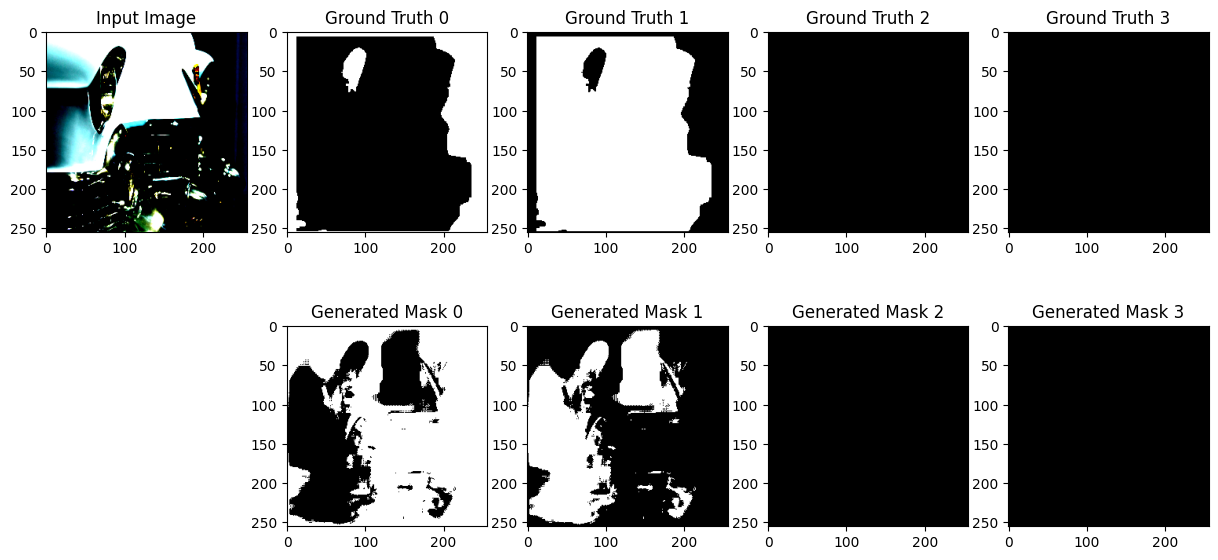

Epoch 2/10
5.69 min
Train loss: 0.4710, Train IoU: 0.5007
Validation loss: 0.5286, Validation IoU: 0.3779
Epoch 3/10


5.60 min
Train loss: 0.4736, Train IoU: 0.5014
Validation loss: 0.4593, Validation IoU: 0.3803


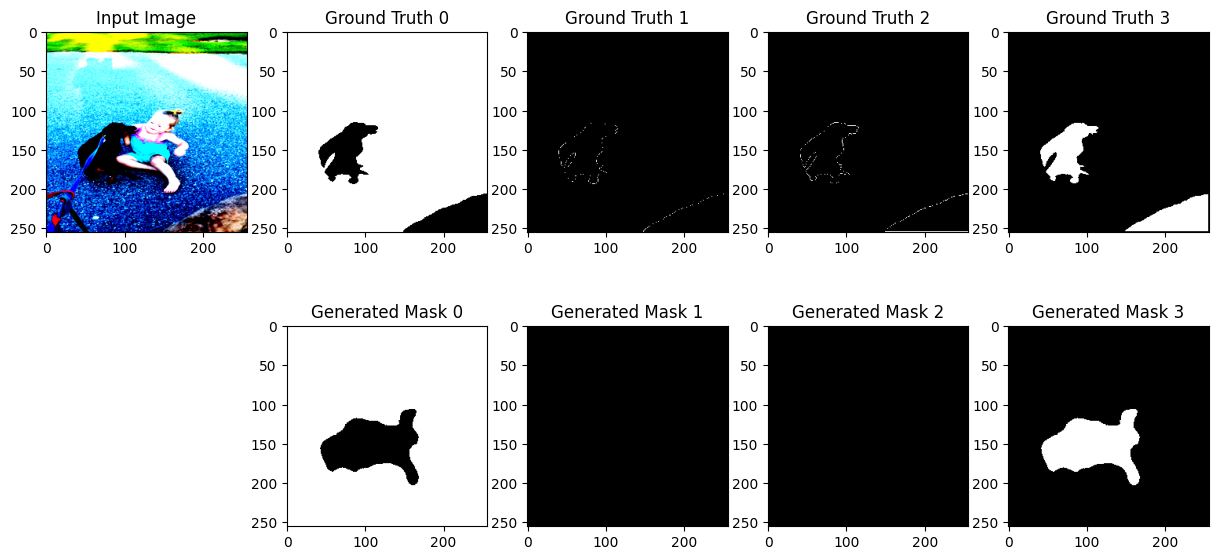

Epoch 4/10
5.58 min
Train loss: 0.4752, Train IoU: 0.5098
Validation loss: 0.4670, Validation IoU: 0.4022
Epoch 5/10


5.61 min
Train loss: 0.4670, Train IoU: 0.5141
Validation loss: 0.5008, Validation IoU: 0.4177


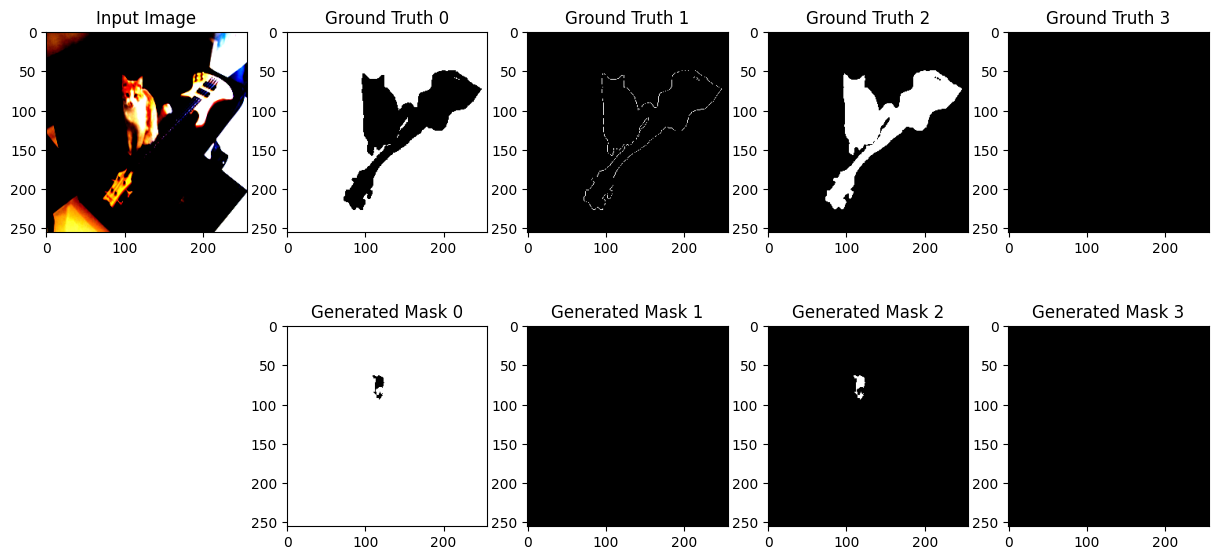

Epoch 6/10
5.66 min
Train loss: 0.4638, Train IoU: 0.5106
Validation loss: 0.4704, Validation IoU: 0.3863
Epoch 7/10


5.69 min
Train loss: 0.4586, Train IoU: 0.5215
Validation loss: 0.4876, Validation IoU: 0.4041


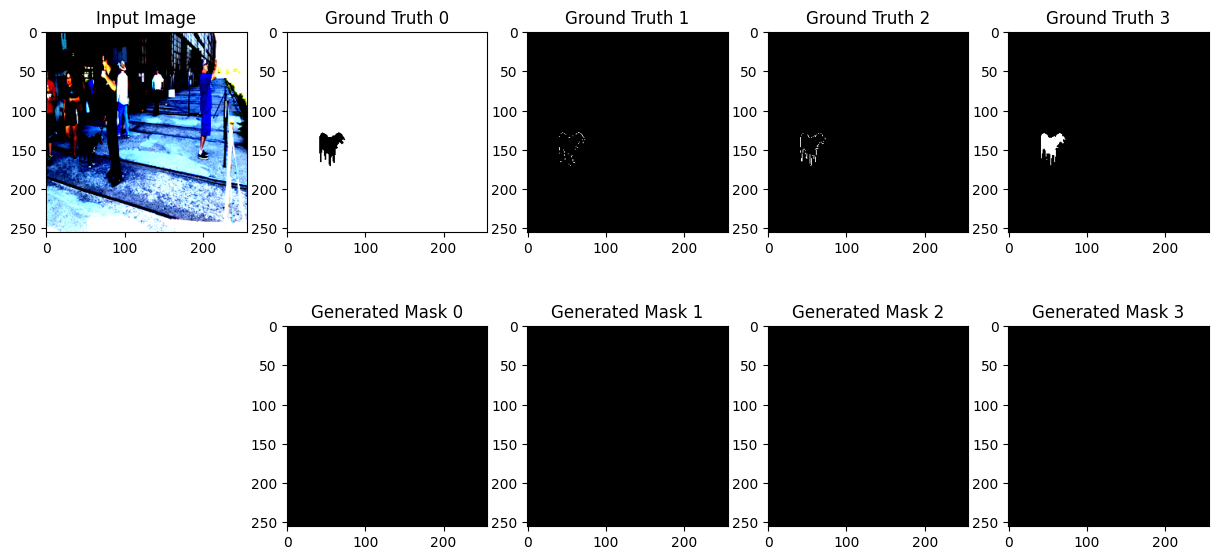

Epoch 8/10
5.69 min
Train loss: 0.4506, Train IoU: 0.5219
Validation loss: 0.4475, Validation IoU: 0.4155
Epoch 9/10


5.69 min
Train loss: 0.4500, Train IoU: 0.5325
Validation loss: 0.4724, Validation IoU: 0.4167


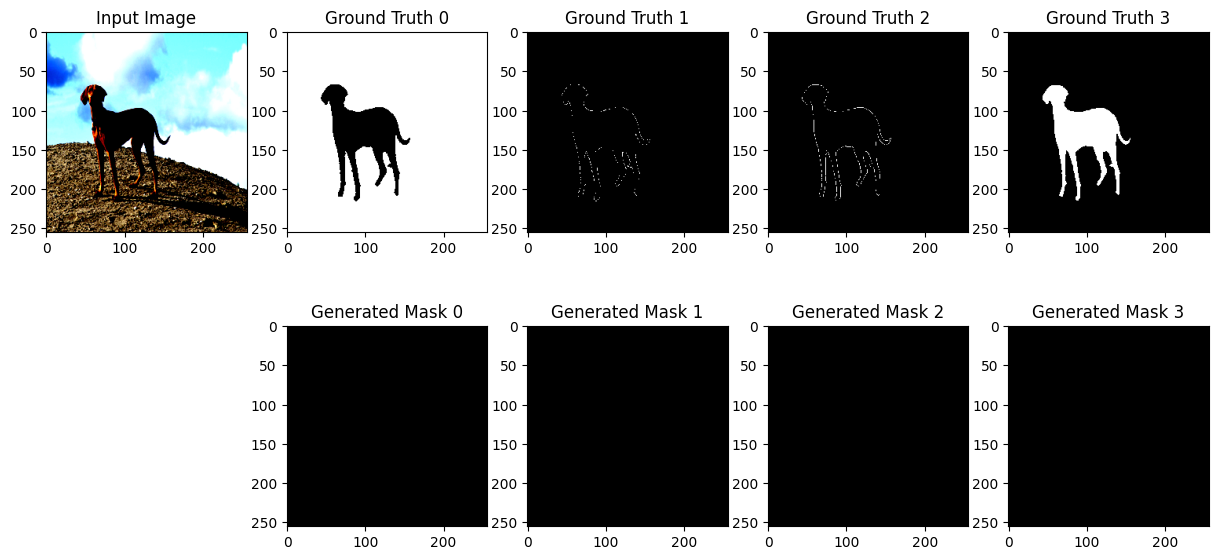

Epoch 10/10
5.61 min
Train loss: 0.4472, Train IoU: 0.5293
Validation loss: 0.4744, Validation IoU: 0.4225


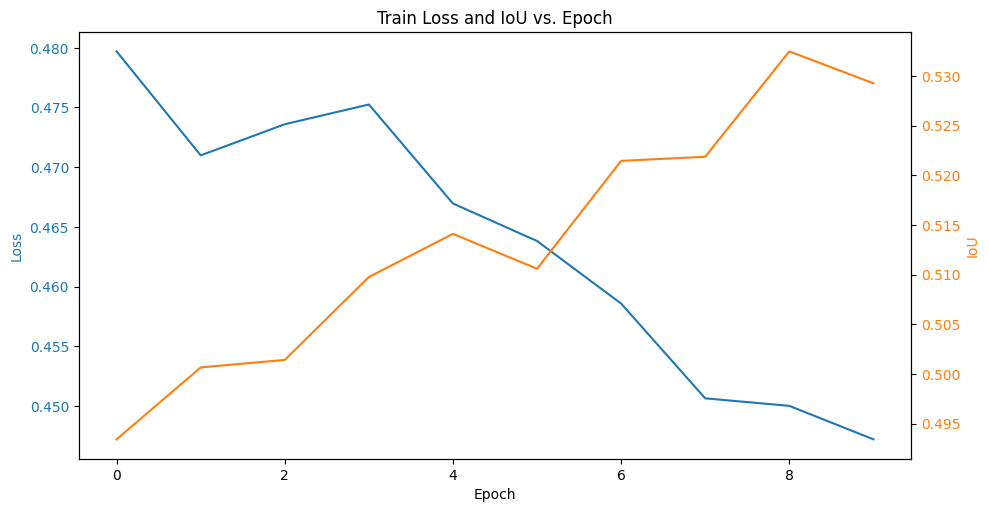

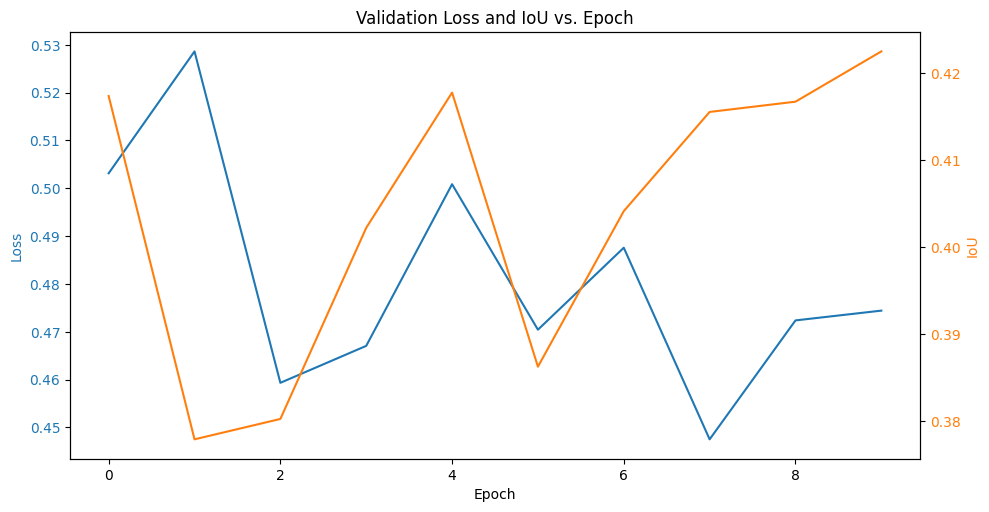

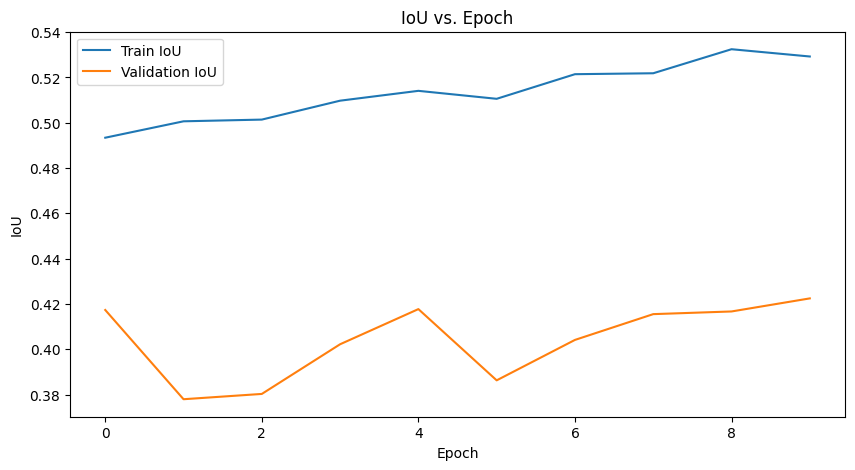

In [53]:
import time

# loss function, and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

train_losses_list = []
validation_losses_list = []
train_ious_list = []
validation_ious_list = []

n_epochs = 10
# Training and validation loop
for epoch in range(n_epochs):

  print(f"Epoch {epoch + 1}/{n_epochs}")
  start_time = time.time()

  model.train()
  train_losses = []
  train_ious = []

  for images, labels in train_loader:
      images, labels = images.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      train_losses.append(loss.item())
      ious = iou_metric(outputs.argmax(1).detach().cpu().numpy(),
                        labels.detach().cpu().numpy(),
                        n_classes)
      train_ious.append(np.nanmean(ious))

  # Save the model state
  model_path = os.path.join("/content/gdrive/MyDrive/OIDv6", "segmentation_model2.pt")
  torch.save(model.state_dict(), model_path)

  # Validate
  model.eval()
  val_losses = []
  val_ious = []

  with torch.no_grad():
      for images, labels in val_loader:
          images, labels = images.to(device), labels.to(device)

          outputs = model(images)
          loss = criterion(outputs, labels)
          val_losses.append(loss.item())

          ious = iou_metric(outputs.argmax(1).detach().cpu().numpy(),
                            labels.detach().cpu().numpy(),
                            n_classes)
          
          val_ious.append(np.nanmean(ious))

      # Show results
      end_time = time.time()
      elapsed_time = end_time - start_time
      print(f"{elapsed_time/60:.2f} min")
      print(f"Train loss: {np.mean(train_losses):.4f}, Train IoU: {np.nanmean(train_ious):.4f}")
      print(f"Validation loss: {np.mean(val_losses):.4f}, Validation IoU: {np.nanmean(val_ious):.4f}")

      # Visualize a random sample
      if(epoch%2==0):
        idx = random.randint(0, len(val_dataset) - 1)
        image, label = val_dataset[idx]
        output = model(image.unsqueeze(0).to(device)).argmax(1).squeeze(0).detach().cpu().numpy()

        plt.figure(figsize=(15, 7))
        plt.subplot(2, 5, 1)
        plt.imshow(image.permute(1, 2, 0).numpy())
        plt.title("Input Image")

        for cls in range(n_classes):
            plt.subplot(2, 5, cls + 2)
            if cls == 0:
                gt_mask = (label.numpy() == 0).astype(np.float32)
            else:
                gt_mask = (label.numpy() == cls).astype(np.float32)
            plt.imshow(gt_mask, cmap="gray")
            plt.title(f"Ground Truth {cls}")

            plt.subplot(2, 5, cls + 2 + 5)
            plt.imshow((output == cls).astype(np.float32), cmap="gray")
            plt.title(f"Generated Mask {cls}")

        plt.show()

  train_losses_list.append(np.mean(train_losses))
  validation_losses_list.append(np.mean(val_losses))
  train_ious_list.append(np.mean(train_ious))
  validation_ious_list.append(np.mean(val_ious))
  if((epoch+1)%10==0):
    graph(train_losses_list, validation_losses_list, train_ious_list, validation_ious_list)



In [56]:
# Metrikos

from sklearn.metrics import f1_score

def dice_score_per_class(pred, target, n_classes=4):
    dice_scores = []
    for cls in range(n_classes):
        pred_inds = (pred == cls)
        target_inds = (target == cls)
        intersection = (pred_inds[target_inds]).sum()
        union = pred_inds.sum() + target_inds.sum()

        if union == 0:
            dice_scores.append(float('nan'))
        else:
            dice_scores.append(2.0 * float(intersection) / float(union))
    return dice_scores

test_dataset = CustomDataset(data_dirs, "test", transform=val_transform)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

dice_scores_list = []
macro_f1_scores = []
micro_f1_scores = []
macro_f1_scores_bg = []
micro_f1_scores_bg = []


model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).argmax(1).detach().cpu().numpy()
        targets = labels.detach().cpu().numpy()

        # dice kiekvienos klases
        dice_scores = dice_score_per_class(outputs, targets)
        dice_scores_list.append(dice_scores)

        # macro_f1 ir micro_f1 be fono
        macro_f1 = f1_score(targets.flatten(), outputs.flatten(), average='macro', labels=list(range(1, n_classes)), zero_division=0)
        micro_f1 = f1_score(targets.flatten(), outputs.flatten(), average='micro', labels=list(range(1, n_classes)), zero_division=0)

        # macro_f1 ir micro_f1 su fonu
        macro_f1_with_bg = f1_score(targets.flatten(), outputs.flatten(), average='macro', labels=list(range(n_classes)), zero_division=0)
        micro_f1_with_bg = f1_score(targets.flatten(), outputs.flatten(), average='micro', labels=list(range(n_classes)), zero_division=0)

        # vidurkiams
        macro_f1_scores.append(macro_f1)
        micro_f1_scores.append(micro_f1)

        macro_f1_scores_bg.append(macro_f1_with_bg)
        micro_f1_scores_bg.append(micro_f1_with_bg)

# dice results
dice_scores_list = np.array(dice_scores_list)
mean_dice_scores = np.nanmean(dice_scores_list, axis=0)

for cls in range(n_classes):
    print(f"Average Dice score for class {cls}: {mean_dice_scores[cls]}")

# f1 be fono
average_macro_f1 = sum(macro_f1_scores) / len(macro_f1_scores)
average_micro_f1 = sum(micro_f1_scores) / len(micro_f1_scores)

print("Average Macro-F1 score:", average_macro_f1)
print("Average Micro-F1 score:", average_micro_f1)

# f1 su fonu
average_macro_f1 = sum(macro_f1_scores_bg) / len(macro_f1_scores_bg)
average_micro_f1 = sum(micro_f1_scores_bg) / len(micro_f1_scores_bg)

print("Average Macro-F1 score (bg):", average_macro_f1)
print("Average Micro-F1 score (bg):", average_micro_f1)

Average Dice score for class 0: 0.9021730013685721
Average Dice score for class 1: 0.2479574102607622
Average Dice score for class 2: 0.37271344407760404
Average Dice score for class 3: 0.21869866816487082
Average Macro-F1 score: 0.22329116239217472
Average Micro-F1 score: 0.5789201286392225
Average Macro-F1 score (bg): 0.39301162213627405
Average Micro-F1 score (bg): 0.8240122257318712


In [12]:
# uzkrovimas seno
n_classes = 4
model = UNet(3, n_classes)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_weights = torch.load('/content/gdrive/MyDrive/OIDv6/segmentation_model2.pt', map_location=device)
model.load_state_dict(model_weights)

model = model.to(device)

In [15]:
!pip install pyngrok
!pip install flask_cors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import io
from PIL import Image
import base64
from flask_cors import CORS, cross_origin

app = Flask(__name__)
CORS(app, expose_headers='Content-Type')
app.config['CORS_HEADERS'] = 'Content-Type'
model = model.to('cpu')
model.eval()

def rgba_mask(mask, color):
    mask_rgba = np.zeros((mask.shape[0], mask.shape[1], 4), dtype=np.uint8)
    mask_rgba[mask > 0] = color
    return Image.fromarray(mask_rgba)

def image_to_base64(image):
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def preprocess_image(image):
    single_image_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    transformed_image = single_image_transform(image)
    return transformed_image

@app.route("/segment", methods=["POST"])
@cross_origin()
def predict():
    print("Received request data:", request.files, request.data)

    try:
        # Get the image from the request
        image_data = request.files['image'].read()
        image = Image.open(io.BytesIO(image_data)).convert("RGB")

        # Preprocess the image
        processed_image = preprocess_image(image)

        # Perform the segmentation
        with torch.no_grad():
            output = model(processed_image.unsqueeze(0)).argmax(1).squeeze(0).detach().numpy()

        # masks
        class_colors = [
        (255, 0, 0, 128),  # Red with transparency for background
        (0, 255, 0, 128),  # Green with transparency for car
        (0, 0, 255, 128),  # Blue with transparency for cat
        (255, 255, 0, 128)  # Yellow with transparency for dog
        ]
        
        masks = []
        for cls in range(n_classes):
            mask = (output == cls).astype(np.float32)
            mask_rgba = rgba_mask(mask, class_colors[cls])
            masks.append({"class": cls, "mask": image_to_base64(mask_rgba)})

        return jsonify({"masks": masks})

    except Exception as e:
        print("Error processing request:", e)
        return jsonify({"error": str(e)}), 500

# Set up pyngrok
ngrok_tunnel = ngrok.connect(5000)
print("Public URL:", ngrok_tunnel.public_url)

# Run the Flask app
app.run(port=5000)

Public URL: https://9448-34-123-182-117.ngrok.io
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [02/May/2023 22:57:40] "OPTIONS /segment HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/May/2023 22:58:47] "OPTIONS /segment HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/May/2023 22:58:58] "OPTIONS /segment HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:00:21] "OPTIONS /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '307320148_564467428764517_7347410486658043548_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:00:55] "POST /segment HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:01:58] "OPTIONS /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '309221855_3365770613655211_2103880706661858639_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:06:51] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '280424020_395586185793296_6689514268643743372_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:11:43] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '280424020_395586185793296_6689514268643743372_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:15:09] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '309221855_3365770613655211_2103880706661858639_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:16:04] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '336772255_201761372550428_8435248042281787373_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:17:00] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '338679914_1358915354681404_3334904857972240824_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:19:50] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '338679914_1358915354681404_3334904857972240824_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:22:12] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '338679914_1358915354681404_3334904857972240824_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:23:54] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '338679914_1358915354681404_3334904857972240824_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:25:03] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '341787412_541529981489707_3197430841633544388_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:25:22] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '341787412_541529981489707_3197430841633544388_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:27:41] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '341787412_541529981489707_3197430841633544388_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:28:12] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '309954905_504651244454550_9093262552974122723_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:28:27] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '309954905_504651244454550_9093262552974122723_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:28:47] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '316148969_1176623476394451_137396119196051831_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:29:01] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '316148969_1176623476394451_137396119196051831_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:29:38] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '343408891_221261177266131_8601321660872456497_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:30:12] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '343408891_221261177266131_8601321660872456497_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:30:31] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '325589606_422085016739823_4638719536815610178_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:30:57] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '319342841_690655579162606_1915742236110880061_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:31:25] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '316256982_453573780063205_5492879629124567265_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:31:46] "POST /segment HTTP/1.1" 200 -


Received request data: ImmutableMultiDict([('image', <FileStorage: '316256982_453573780063205_5492879629124567265_n.jpg' ('image/jpeg')>)]) b''


INFO:werkzeug:127.0.0.1 - - [02/May/2023 23:32:15] "POST /segment HTTP/1.1" 200 -
